<a href="https://colab.research.google.com/github/Victoriambaka/INDEPENDENT-PROJECT-WEEK-11/blob/main/Week_11_Independent_project_Regression_Victoria_Mbaka_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INDEPENDENT PROJECT 11: PREDICTION WITH REGRESSION**:(1 - 3)

---



---



1. Defining the Question

### a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

***Input***: Home team, Away team, Tournament type (World cup, Friendly, Other)

***`Approach 1`***: Polynomial approach

What to train given:

*   Rank of home team
*   Rank of away team
*   Tournament scores.


Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

### b) Defining the Metric for Success


*   Being able to predict the goals for home team scores and the away team scores.



### c) Understanding the context

*   This is a problem that requires prediction(prediction problems are worked out using regression.)





### e) Data Relevance
The data provided is upto date and relevant for the analysis to be done.
the dataset can be found here: [Dataset](https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc)

### d) Recording the Experimental Design

 The flow of this prediction analysis is as follows:

1.   Define the question
2.   Define the metric for success
3.   Understansing the context
4.   Documenting the experimental design taken and the appropriateness of the available data to answer the given question.

Expected flow for the assessment:

1.   Perform EDA
2.   Perform any necessary feature engineering 
3.   Check of multicollinearity
4.   Start building the model
5.   Cross-validate the model
6.   Compute RMSE
7.   Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
8.   Perform appropriate regressions on the data including your justification
9.   Challenge your solution by providing insights on how you can make improvements. 



## 2. Reading the Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# Loading the Datasets
url = '/content/fifa_ranking.csv'
ranking = pd.read_csv(url)
url1 = '/content/results.csv'
results = pd.read_csv(url1)

## 3. Checking the Data

In [7]:
# Determining the no. of records in our dataset
#
print('ranking = ',ranking.shape)
print('results = ',results.shape)

ranking =  (57793, 16)
results =  (40839, 9)


In [8]:
# Previewing the top of our datasets
print('results')
print('*'*100)
print(results.head())
print('*'*100)
print('ranking')
print('*'*100)
print(ranking.head())

results
****************************************************************************************************
         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  
****************************************************************************************************
ranking
****************************************************************************************************
   rank country_full country_abrv  total_points  previou

In [9]:
# Previewing the bottom of our dataset
# 
print('results')
print('*'*100)
print(results.tail())
print('*'*100)
print('ranking')
print('*'*100)
print(ranking.tail())

results
****************************************************************************************************
             date         home_team        away_team  home_score  away_score  \
40834  2019-07-18    American Samoa           Tahiti           8           1   
40835  2019-07-18              Fiji  Solomon Islands           4           4   
40836  2019-07-19           Senegal          Algeria           0           1   
40837  2019-07-19        Tajikistan      North Korea           0           1   
40838  2019-07-20  Papua New Guinea             Fiji           1           1   

                   tournament       city country  neutral  
40834           Pacific Games       Apia   Samoa     True  
40835           Pacific Games       Apia   Samoa     True  
40836  African Cup of Nations      Cairo   Egypt     True  
40837    Intercontinental Cup  Ahmedabad   India     True  
40838           Pacific Games       Apia   Samoa     True  
**************************************************

In [10]:
# Checking whether each column has an appropriate datatype
#
print('ranking :',ranking.dtypes)
print('*'*100)
print('results :',results.dtypes)

ranking : rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
****************************************************************************************************
results : date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


## 5. Tidying the Dataset

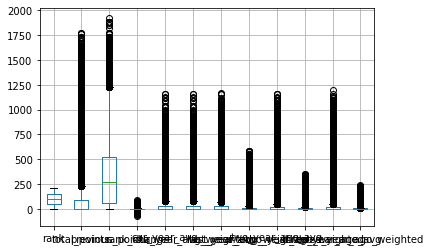

In [11]:
# Checking for Outliers
#
ranking.boxplot();

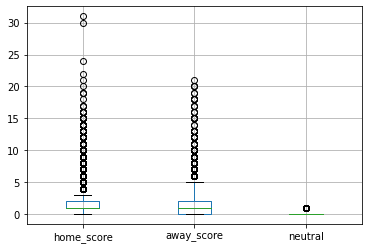

In [12]:
results.boxplot();

In [13]:
# There seems to be a number of outliers, but for this analysis, they will not be dropped since they are valid observations
# and their removal might distort the correct prediction.

In [14]:
# Checking for Anomalies
#
print('ranking:',ranking.duplicated().sum())
print('results:',results.duplicated().sum())

ranking: 37
results: 0


In [15]:
ranking = ranking.drop_duplicates()


In [16]:
# Identifying the Missing Data
#
print('ranking:',ranking.isnull().sum())
print('*'*100)
print('results:',results.isnull().sum())

ranking: rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
****************************************************************************************************
results: date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


In [17]:
# Dealing with the Missing Data
# There is no missing data.

In [18]:
# More data cleaning procedures
# droppig unnecessary columns
to_drop = ['country_abrv', 'rank_date']
ranking.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
ranking.columns = ['rank', 'country', 'total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted', 'confederation']
ranking.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1,2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
2,3,Switzerland,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
3,4,Sweden,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
4,5,Argentina,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL


In [20]:
# merging datasets
data = ranking.merge(results, how = 'left',on = 'country')
data.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1909-04-04,Germany,Switzerland,1.0,0.0,Friendly,Karlsruhe,False
1,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1910-05-16,Germany,Belgium,0.0,3.0,Friendly,Duisburg,False
2,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1910-10-16,Germany,Netherlands,1.0,2.0,Friendly,Kleve,False
3,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1911-03-26,Germany,Switzerland,6.0,2.0,Friendly,Stuttgart,False
4,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,...,0.0,UEFA,1911-10-09,Germany,Austria,1.0,2.0,Friendly,Dresden,False


In [21]:
data = data.drop(columns=['date', 'city', 'neutral'])


In [22]:
data.isnull().sum()

rank                          0
country                       0
total_points                  0
previous_points               0
rank_change                   0
cur_year_avg                  0
cur_year_avg_weighted         0
last_year_avg                 0
last_year_avg_weighted        0
two_year_ago_avg              0
two_year_ago_weighted         0
three_year_ago_avg            0
three_year_ago_weighted       0
confederation                 0
home_team                  4774
away_team                  4774
home_score                 4774
away_score                 4774
tournament                 4774
dtype: int64

In [25]:
data = data.dropna()

In [26]:
data.duplicated().sum()

1245720

In [27]:
data = data.drop_duplicates()

In [28]:
data.shape

(8994981, 19)

## 6. Exploratory Analysis

### Univariate analysis

In [29]:
data.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,8.994981e+06,8.994981e+06,8.994981e+06,8.994981e+06,8.994981e+06,8.994981e+06,8.994981e+06,8.994981e+06,8.994981e+06,8.994981e+06,8.994981e+06,8.994981e+06,8.994981e+06,8.994981e+06
mean,7.076319e+01,1.706212e+02,4.510516e+02,-2.533624e-02,8.603191e+01,8.603191e+01,8.514701e+01,4.257357e+01,8.421733e+01,2.526523e+01,8.374251e+01,1.674852e+01,1.760275e+00,1.203626e+00
std,5.015827e+01,3.305953e+02,3.450813e+02,5.507951e+00,1.735763e+02,1.735763e+02,1.735034e+02,8.675173e+01,1.715211e+02,5.145635e+01,1.705023e+02,3.410046e+01,1.766857e+00,1.406205e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.700000e+01,0.000000e+00,1.430000e+02,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,6.400000e+01,0.000000e+00,4.360000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,1.070000e+02,2.053500e+02,6.460000e+02,1.000000e+00,8.755000e+01,8.755000e+01,8.633000e+01,4.316000e+01,8.282000e+01,2.485000e+01,8.314000e+01,1.663000e+01,2.000000e+00,2.000000e+00
max,2.090000e+02,1.775030e+03,1.920000e+03,9.200000e+01,1.158660e+03,1.158660e+03,1.169570e+03,5.847900e+02,1.159710e+03,3.479100e+02,1.200770e+03,2.401500e+02,3.100000e+01,2.100000e+01


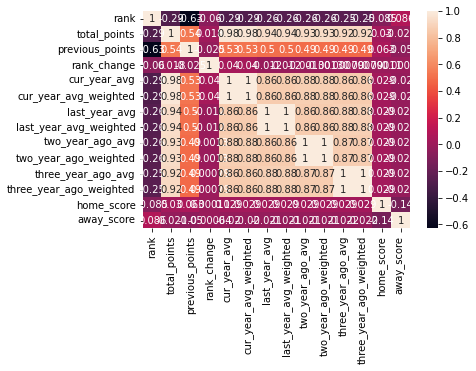

In [30]:
# Using the heatmap to understand the correlation between features. Only those with positive correlation with the home scores and away scores will be plotted.
sns.heatmap(data.corr(),annot=True);

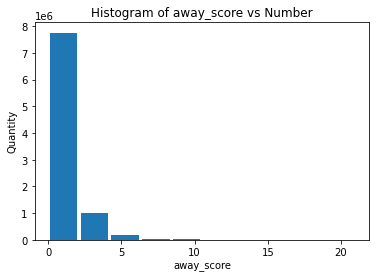

In [31]:
away_score= data['away_score']

plt.hist(away_score, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('away_score')
plt.ylabel('Quantity')
plt.title('Histogram of away_score vs Number')
plt.show()

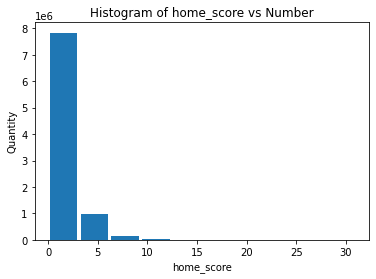

In [32]:
home_score = data['home_score']

plt.hist(home_score, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('home_score')
plt.ylabel('Quantity')
plt.title('Histogram of home_score vs Number')
plt.show()

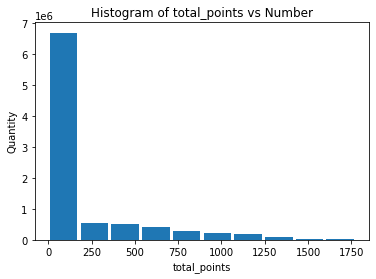

In [33]:
total_points = data['total_points']

plt.hist(total_points, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('total_points')
plt.ylabel('Quantity')
plt.title('Histogram of total_points vs Number')
plt.show()

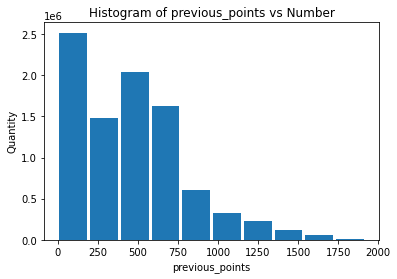

In [34]:
previous_points = data['previous_points']

plt.hist(previous_points, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('previous_points')
plt.ylabel('Quantity')
plt.title('Histogram of previous_points vs Number')
plt.show()

### Bivariate analysis

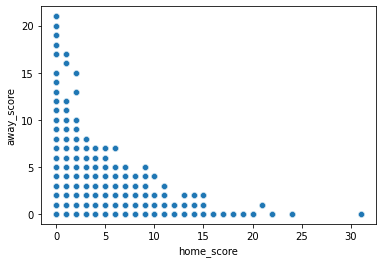

In [35]:
sns.scatterplot(x = data['home_score'], y = data['away_score']);

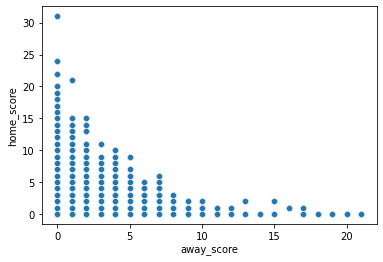

In [36]:
sns.scatterplot(x = data['away_score'], y = data['home_score']);

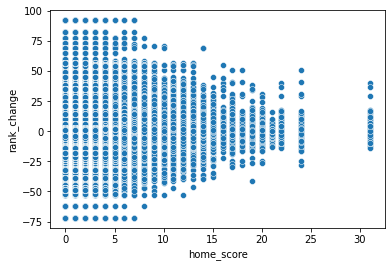

In [37]:
sns.scatterplot(x = data['home_score'], y = data['rank_change']);

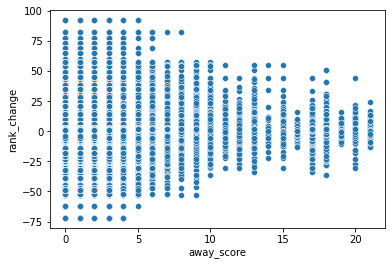

In [38]:
sns.scatterplot(x = data['away_score'], y = data['rank_change']);

## Checking for multicollinearity.

In [39]:
# Focusing on independent features only

# Removing the serial and admit chance columns, we want to focus on our independent variables only.
independent_only = data.drop(columns=['rank', 'rank_change','cur_year_avg_weighted', 'last_year_avg_weighted', 'two_year_ago_weighted', 'three_year_ago_weighted'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,total_points,previous_points,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,home_score,away_score
total_points,1.000000,0.535525,0.977089,0.940651,0.931054,0.923187,0.030221,-0.021424
previous_points,0.535525,1.000000,0.526597,0.504219,0.492587,0.485273,0.062654,-0.050009
cur_year_avg,0.977089,0.526597,1.000000,0.863268,0.875792,0.864727,0.028844,-0.019688
last_year_avg,0.940651,0.504219,0.863268,1.000000,0.861840,0.880630,0.028715,-0.020902
two_year_ago_avg,0.931054,0.492587,0.875792,0.861840,1.000000,0.866882,0.028968,-0.021074
three_year_ago_avg,0.923187,0.485273,0.864727,0.880630,0.866882,1.000000,0.029402,-0.022499
home_score,0.030221,0.062654,0.028844,0.028715,0.028968,0.029402,1.000000,-0.136154
away_score,-0.021424,-0.050009,-0.019688,-0.020902,-0.021074,-0.022499,-0.136154,1.000000


In [40]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
# Interpreting the table is straightforward: The VIF score for each variable is found alongside the 
# downwards sloping diagonal. Total points has a score of 788702.576624, previous_points has a score of 1.410112 etc.

# The highest value is for total points. Let's see how the VIF scores improve if we remove it from our dataset


,total_points,previous_points,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,home_score,away_score
total_points,788702.576624,2.032713,-414103.155469,-206983.711640,-122754.365190,-81344.867358,0.037211,1.113485
previous_points,2.032713,1.410112,-1.529261,-0.771733,-0.394342,-0.214213,-0.059443,0.046605
cur_year_avg,-414103.155469,-1.529261,217428.074574,108673.922085,64449.120258,42708.014043,-0.007943,-0.604967
last_year_avg,-206983.711640,-0.771733,108673.922085,54325.794688,32213.643632,21345.342992,-0.005113,-0.297190
two_year_ago_avg,-122754.365190,-0.394342,64449.120258,32213.643632,19111.379702,12658.874131,-0.009772,-0.169953
three_year_ago_avg,-81344.867358,-0.214213,42708.014043,21345.342992,12658.874131,8395.726351,-0.012653,-0.099435
home_score,0.037211,-0.059443,-0.007943,-0.005113,-0.009772,-0.012653,1.022181,0.136245
away_score,1.113485,0.046605,-0.604967,-0.297190,-0.169953,-0.099435,0.136245,1.020795


In [41]:
revised = independent_only.drop(columns=['total_points'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

# All scores have dropped, but all the previous points have droped significantly, indicating collinearity.

,previous_points,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,home_score,away_score
previous_points,1.410107,-0.461998,-0.238277,-0.077969,-0.004564,-0.059443,0.046602
cur_year_avg,-0.461998,5.907522,-1.528790,-2.260376,-1.579222,0.011595,-0.020339
last_year_avg,-0.238277,-1.528790,5.879736,-1.483946,-2.454096,0.004652,-0.004971
two_year_ago_avg,-0.077969,-2.260376,-1.483946,5.781952,-1.712825,-0.003980,0.003350
three_year_ago_avg,-0.004564,-1.579222,-2.454096,-1.712825,6.014384,-0.008816,0.015407
home_score,-0.059443,0.011595,0.004652,-0.003980,-0.008816,1.022181,0.136245
away_score,0.046602,-0.020339,-0.004971,0.003350,0.015407,0.136245,1.020794
